# Dispersion

Ling 571  
October 18, 2018

In [1]:
import nltk
nltk.download(['brown','universal_tagset'])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

## Tag frequencies

In [0]:
brown = nltk.corpus.brown

In [3]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [4]:
nltk.FreqDist(brown.tagged_words()).most_common(10)

[(('the', 'AT'), 62288),
 ((',', ','), 58153),
 (('.', '.'), 48812),
 (('of', 'IN'), 34864),
 (('and', 'CC'), 27676),
 (('a', 'AT'), 21824),
 (('in', 'IN'), 18975),
 (('to', 'TO'), 14679),
 (('to', 'IN'), 10903),
 (('is', 'BEZ'), 9976)]

Convert list of (word,tag) pairs to just tags, to build a tag frequency dictionary

In [5]:
[t for (w,t) in brown.tagged_words()][:10]

['AT', 'NP-TL', 'NN-TL', 'JJ-TL', 'NN-TL', 'VBD', 'NR', 'AT', 'NN', 'IN']

In [6]:
ftags = nltk.FreqDist([t for (w,t) in brown.tagged_words()])
ftags.most_common(10)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476)]

We can also normalize the tags at this step (e.g., only consider the first two letters)

In [7]:
fshort = nltk.FreqDist([t[0:2] for (w,t) in brown.tagged_words()])
fshort.most_common(10)

[('NN', 227799),
 ('IN', 122591),
 ('VB', 115842),
 ('AT', 99077),
 ('JJ', 71994),
 ('PP', 64108),
 ('.', 60638),
 (',', 58156),
 ('NP', 43179),
 ('CC', 38151)]

NLTK provides a mapping from corpus-specific tags to a small set of "universal" tags

In [8]:
brown.tagged_words(tagset = 'universal')[:10]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP')]

In [9]:
funiv = nltk.FreqDist([t for (w,t) in brown.tagged_words(tagset='universal')])
funiv.most_common()

[('NOUN', 275558),
 ('VERB', 182750),
 ('.', 147565),
 ('ADP', 144766),
 ('DET', 137019),
 ('ADJ', 83721),
 ('ADV', 56239),
 ('PRON', 49334),
 ('CONJ', 38151),
 ('PRT', 29829),
 ('NUM', 14874),
 ('X', 1386)]

---

## Conditional frequencies

What is the most common tag for the word *run*?

In [10]:
[t for (w,t) in brown.tagged_words(tagset='universal') if w.lower() == 'run'][:10]

['VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'VERB',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN']

In [11]:
run_tags = [t for (w,t) in brown.tagged_words(tagset='universal') 
                            if w.lower() == 'run']
nltk.FreqDist(run_tags).most_common()

[('VERB', 157), ('NOUN', 55)]

In [0]:
ctags = nltk.ConditionalFreqDist(brown.tagged_words(tagset='universal'))

In [13]:
ctags['run'].most_common()

[('VERB', 154), ('NOUN', 52)]

In [14]:
norm_pairs = [(w.lower(),t) for (w,t) in brown.tagged_words(tagset='universal')]
ctags = nltk.ConditionalFreqDist(norm_pairs)
ctags['run'].most_common()

[('VERB', 157), ('NOUN', 55)]

In [15]:
ctags['so'].most_common()

[('ADV', 1505), ('ADP', 479), ('PRT', 1)]

In [17]:
ctags['so']['ADV']

1505

In [18]:
len(ctags.conditions())

49815

In [0]:
rnorm_pairs = [(t,w.lower()) for (w,t) 
                        in brown.tagged_words(tagset='universal')]
crtags = nltk.ConditionalFreqDist(rnorm_pairs)

In [20]:
crtags['NOUN'].most_common(10)

[('time', 1597),
 ('man', 1203),
 ('af', 995),
 ('years', 949),
 ('way', 899),
 ('people', 845),
 ('mr.', 844),
 ('state', 787),
 ('world', 787),
 ('men', 763)]

In [21]:
crtags['ADV'].most_common(10)

[('not', 4610),
 ('when', 2331),
 ('so', 1505),
 ('only', 1378),
 ('then', 1351),
 ('now', 1314),
 ('more', 1212),
 ('even', 1116),
 ('as', 1104),
 ('also', 1069)]

In [22]:
crtags['X'].most_common(10)

[('de', 67),
 ('la', 34),
 ('et', 29),
 ('comedie', 14),
 ('le', 11),
 ('quo', 11),
 ('du', 10),
 ('(', 10),
 (')', 10),
 ('al', 9)]

----

## Dispersion metrics

In [0]:
def normalize(tokens):
  return [w.lower() for w in tokens if w.isalpha()]

In [0]:
words = normalize(brown.words())
freq = nltk.FreqDist(words)

In [26]:
freq['fog']

25

In [27]:
freq['yeah']

25

In [28]:
freq['tilghman']

25

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')

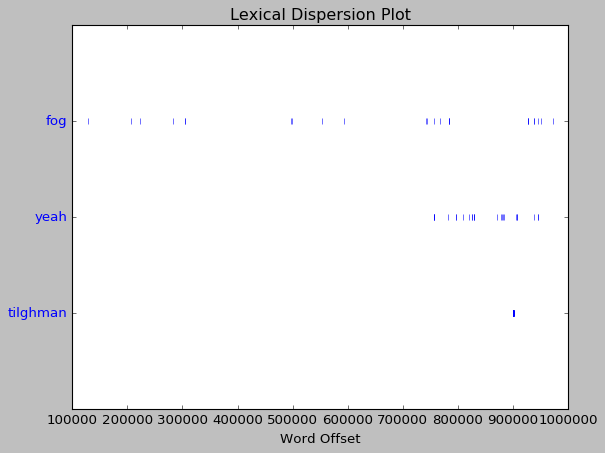

In [30]:
nltk.draw.dispersion_plot(words, ['fog','yeah','tilghman'])

In [31]:
brown.fileids()[:10]

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10']

In [32]:
brown.words('ca05')[:10]

['East',
 'Providence',
 'should',
 'organize',
 'its',
 'civil',
 'defense',
 'setup',
 'and',
 'begin']

In [33]:
[(f,w) for f in brown.fileids()
                        for w in normalize(brown.words(f))][:10]

[('ca01', 'the'),
 ('ca01', 'fulton'),
 ('ca01', 'county'),
 ('ca01', 'grand'),
 ('ca01', 'jury'),
 ('ca01', 'said'),
 ('ca01', 'friday'),
 ('ca01', 'an'),
 ('ca01', 'investigation'),
 ('ca01', 'of')]

In [0]:
byparts = nltk.ConditionalFreqDist([(f,w) for f in brown.fileids()
                                          for w in normalize(brown.words(f))])

In [35]:
byparts['ca01'].most_common(10)

[('the', 155),
 ('of', 65),
 ('to', 55),
 ('a', 54),
 ('in', 40),
 ('and', 40),
 ('that', 28),
 ('said', 24),
 ('for', 22),
 ('be', 21)]

In [36]:
byparts['ca02'].most_common(10)

[('the', 134),
 ('of', 94),
 ('to', 56),
 ('a', 49),
 ('in', 36),
 ('and', 33),
 ('would', 26),
 ('for', 24),
 ('by', 22),
 ('texas', 21)]

In [37]:
byparts['ca01'].N() / freq.N()

0.0019374238578163134

In [38]:
byparts['ca01']['fog'] / freq['fog']

0.0

In [39]:
abs(byparts['ca01'].N() / freq.N() - byparts['ca01']['fog'] / freq['fog'])

0.0019374238578163134

In [40]:
sum([abs(byparts[f].N() / freq.N() - byparts[f]['fog'] / freq['fog'])
    for f in byparts.conditions()]) / 2

0.9638775368843945

In [0]:
def dp(w):
  return sum([abs(byparts[f].N() / freq.N() - byparts[f][w] / freq[w])
    for f in byparts.conditions()]) / 2

In [42]:
dp('fog')

0.9638775368843945

In [43]:
dp('yeah')

0.9724329643196202

In [44]:
dp('tilghman')

0.998006551792983